# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
file_path = "adult.csv"

data = pd.read_csv(file_path)

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
pd.set_option("display.colheader_justify", "left")

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,NaN,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,NaN,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,NaN,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,NaN,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,NaN,40.0,Cuba,<=50K


In [3]:
data.dtypes

age               float64
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
income             object
dtype: object

In [5]:
data.isnull().sum()

age               1628
workclass         3256
fnlwgt             651
education          326
education-num     2605
marital-status     977
occupation        4884
relationship      1302
race               163
sex                 33
capital-gain      1954
capital-loss      2279
hours-per-week    2930
native-country    3907
income             651
dtype: int64

In [7]:
data = data.dropna()

In [8]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != "O"]
categorical_features = [feature for feature in data.columns if data[feature].dtypes == "O"]
target_variable = "income"
print("Numerical Features: ", numerical_features)
print("Categorical Features: ", categorical_features)
print("Target Variable: ", target_variable)

Numerical Features:  ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical Features:  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
Target Variable:  income


C:\Users\muham\AppData\Local\Temp\ipykernel_11756\1330337213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[target_variable] = pd.factorize(data[target_variable])[0]


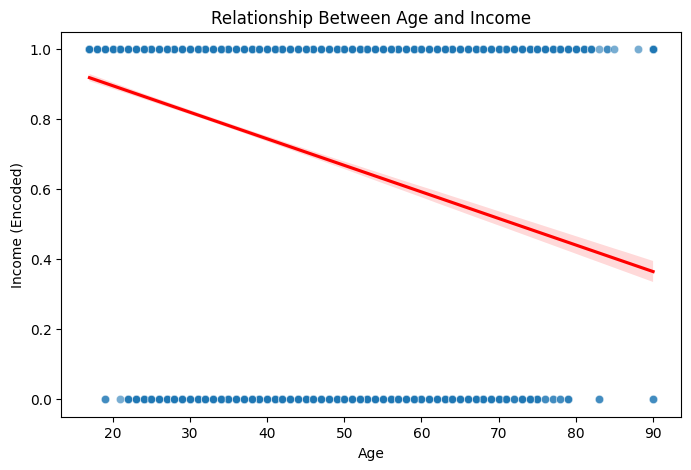

In [9]:

data[target_variable] = pd.factorize(data[target_variable])[0]  
# 0 -->  <=50K
# 1 -->  >50K

plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["age"], y=data[target_variable], alpha=0.6)
sns.regplot(x=data["age"], y=data[target_variable], scatter=False, color='red')  # Regression line
plt.title("Relationship Between Age and Income")
plt.xlabel("Age")
plt.ylabel("Income (Encoded)")
plt.show()


In [18]:
data.isnull().sum()

age               1628
workclass         3256
fnlwgt             651
education          326
education-num     2605
marital-status     977
occupation        4884
relationship      1302
race               163
sex                 33
capital-gain      1954
capital-loss      2279
hours-per-week    2930
native-country    3907
income             651
dtype: int64

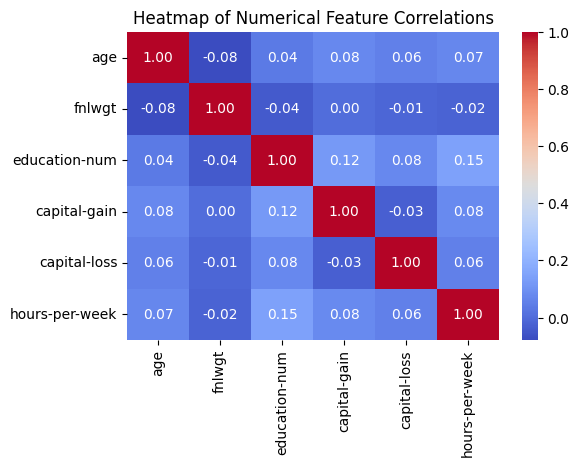

In [32]:
plt.figure(figsize=(6, 4))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Numerical Feature Correlations")
plt.show()

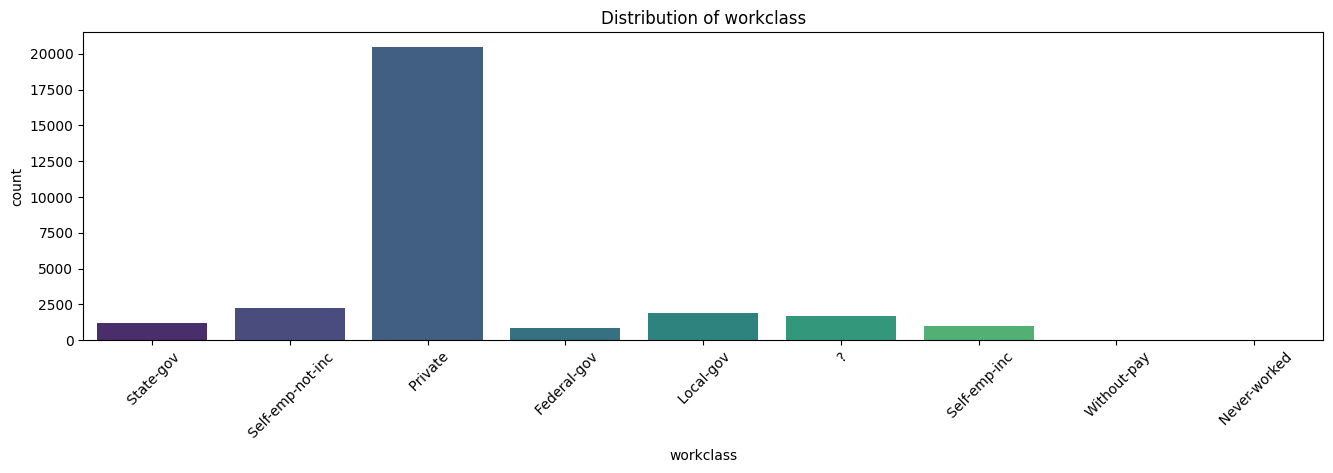

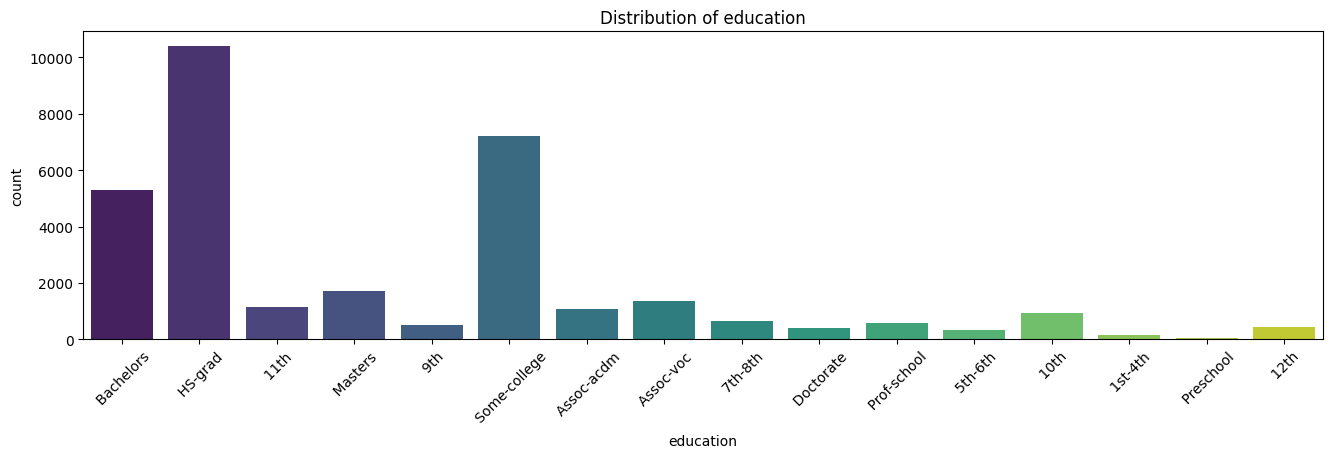

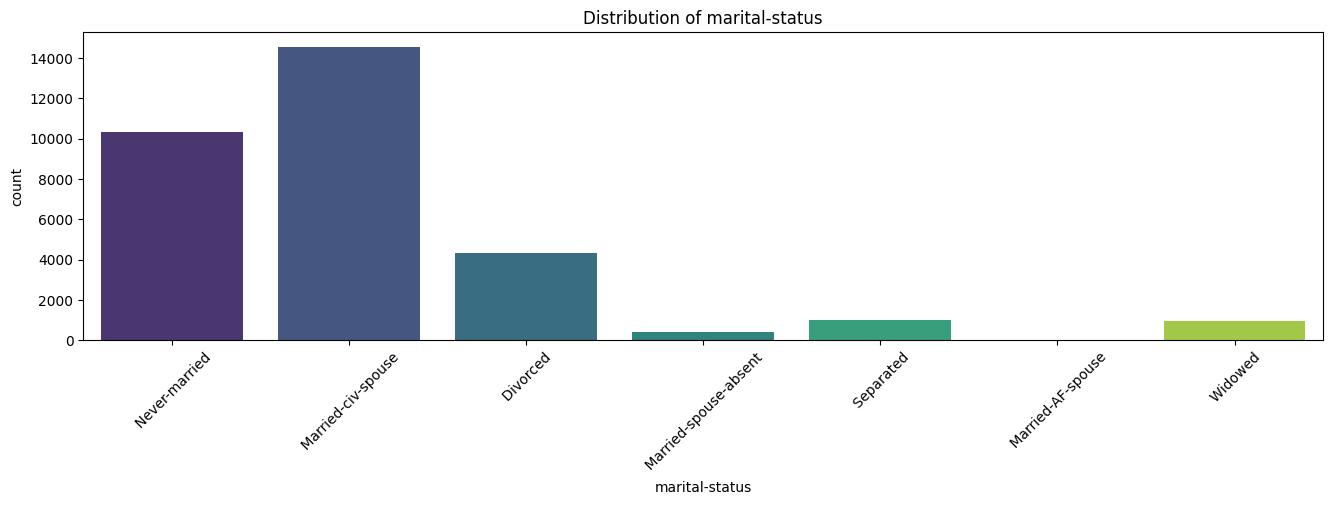

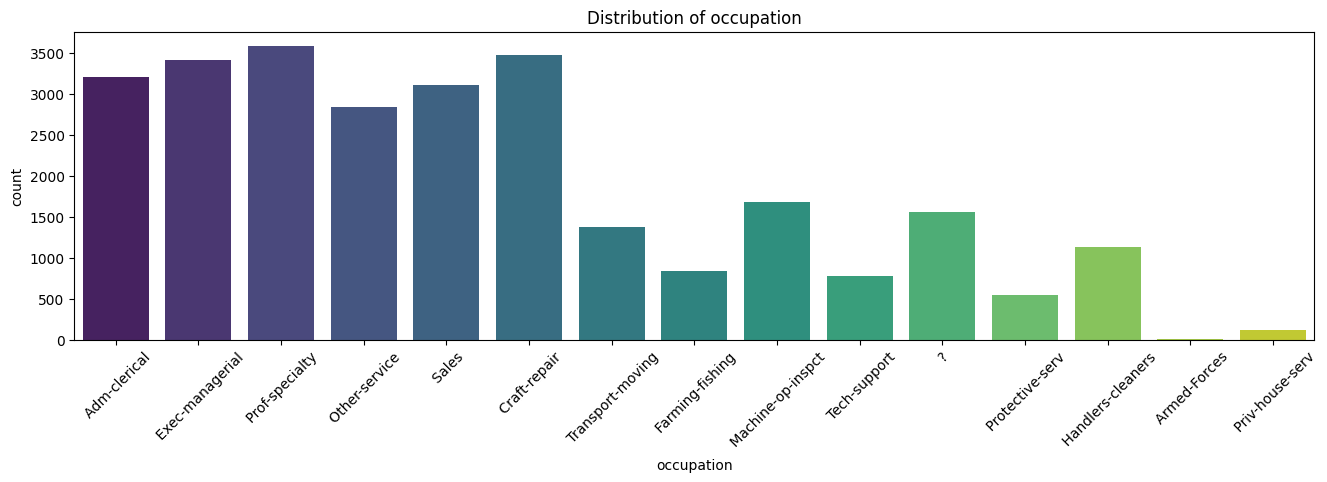

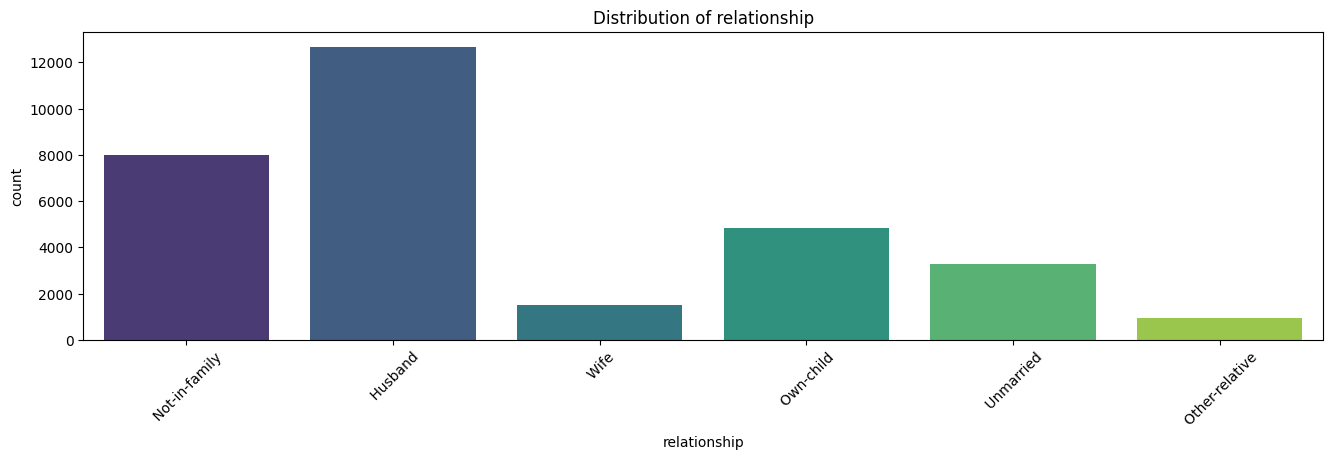

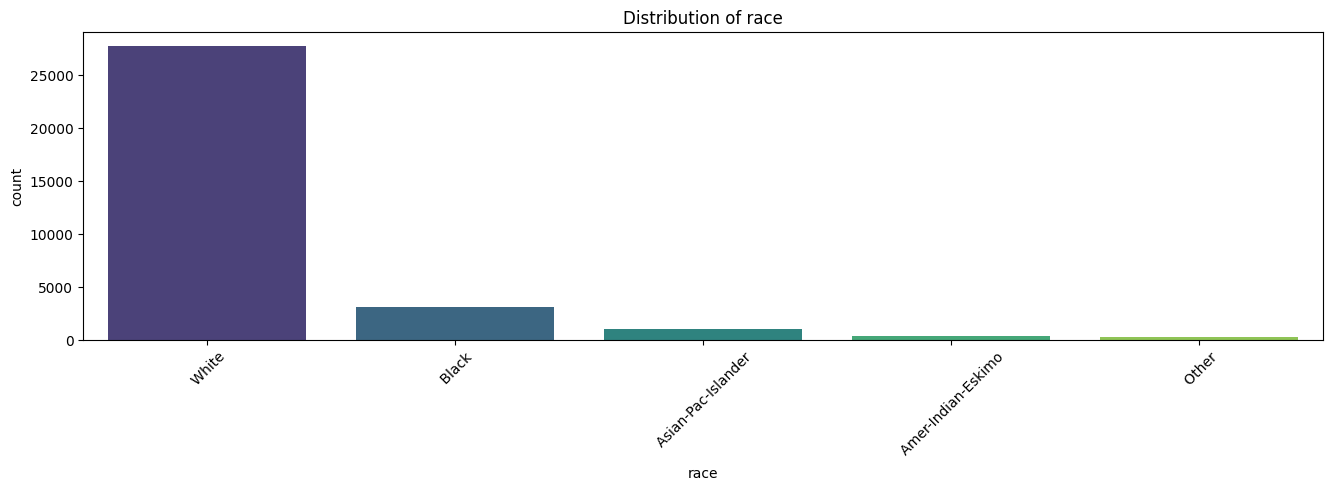

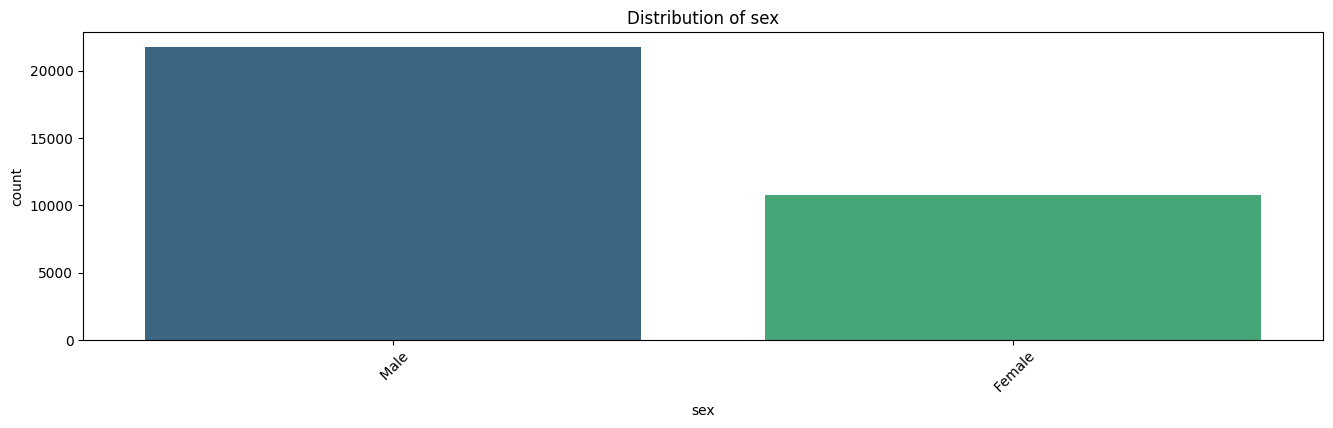

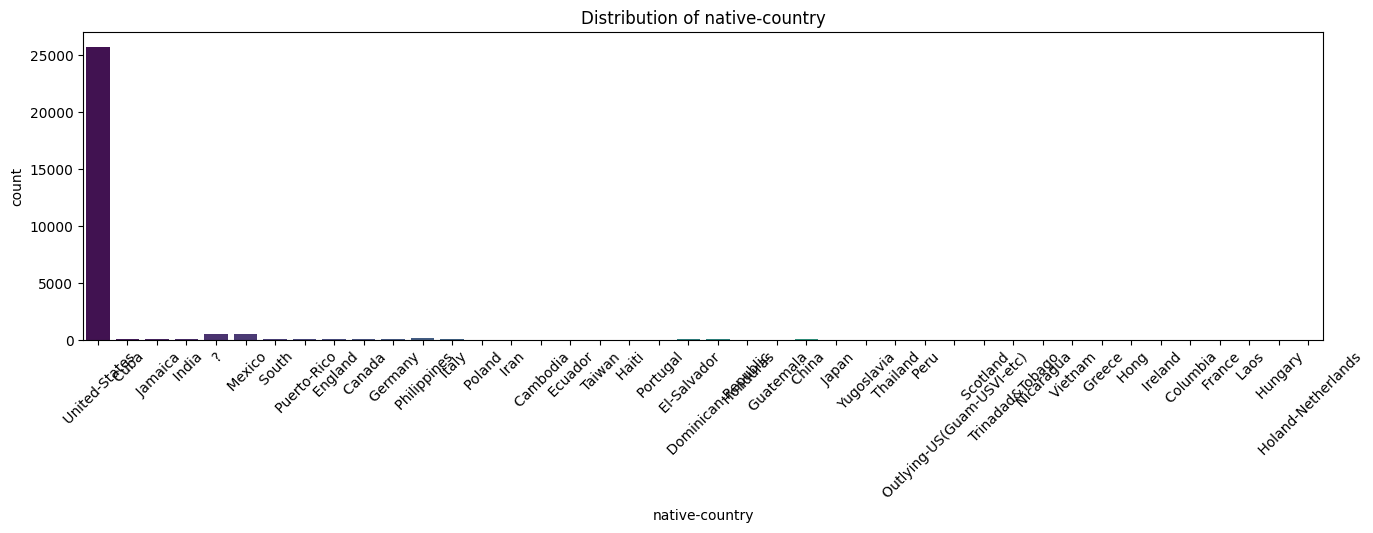

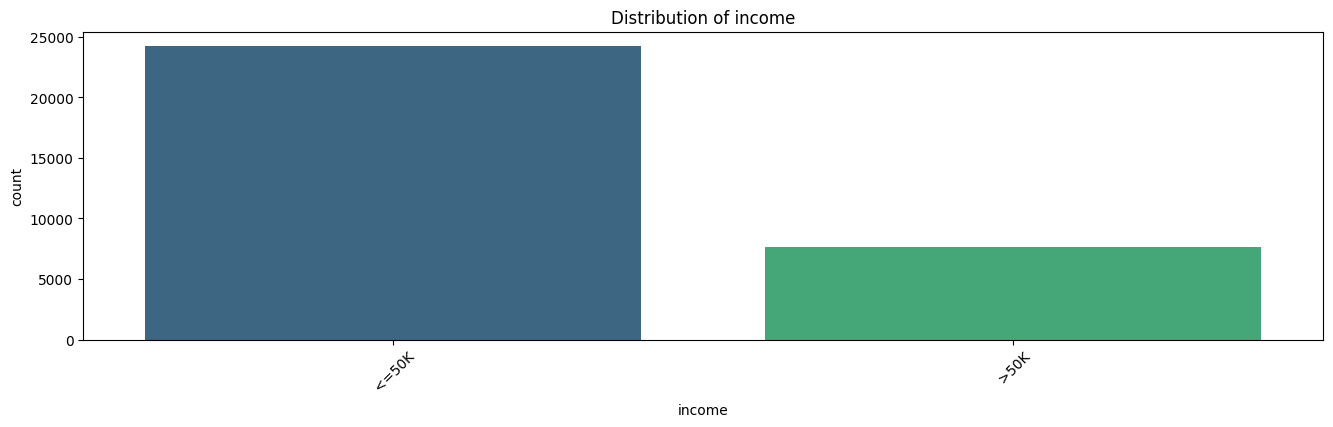

In [28]:
for feature in categorical_features:
    plt.figure(figsize=(16, 4))
    sns.countplot(x=data[feature], hue=data[feature], palette="viridis", legend=False)
    plt.title(f"Distribution of {feature}")
    plt.xticks(rotation=45)
    plt.show()